In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.shape

(4209, 378)

In [4]:
df_test.shape

(4209, 377)

In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# df_train and df_test don't have the same number of columns. 
# Next steps verify which columns are not shared, and then remove those columns.

In [8]:
a = df_train.columns
b = df_test.columns

In [9]:
np.setdiff1d(a,b)

array(['y'], dtype=object)

In [10]:
np.setdiff1d(b,a)

array([], dtype=object)

In [11]:
df_train_y = df_train['y']
df_train_ID = df_train['ID']
df_test_ID = df_test['ID']

In [12]:
df_train=df_train.drop(['ID','y'], axis=1)

In [13]:
df_test=df_test.drop(['ID'], axis=1)

In [14]:
df_train.shape

(4209, 376)

In [15]:
df_test.shape

(4209, 376)

In [16]:
df_train.dtypes.tolist()

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int6

In [17]:
df_test.dtypes.tolist()

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int6

In [18]:
# Remove all columns where the variance in either df_train or df_test is equal to zero

In [19]:
train_var=df_train.var()
test_var=df_test.var()

In [20]:
drop_train = train_var[train_var==0]
drop_test = test_var[test_var==0]

In [21]:
drop_train = drop_train.reset_index()
drop_test = drop_test.reset_index()

In [22]:
drop_all = pd.concat([drop_train, drop_test], ignore_index=True)

In [23]:
drop_all

,index,0
0,X11,0.0
1,X93,0.0
2,X107,0.0
3,X233,0.0
4,X235,0.0
5,X268,0.0
6,X289,0.0
7,X290,0.0
8,X293,0.0
9,X297,0.0


In [24]:
drop_all.shape

(17, 2)

In [25]:
drop_train.shape

(12, 2)

In [26]:
drop_test.shape

(5, 2)

In [27]:
drop_columns = drop_all['index'].tolist()

In [28]:
df_train=df_train.drop(drop_columns, axis=1)

In [29]:
df_train.shape

(4209, 359)

In [30]:
df_test=df_test.drop(drop_columns, axis=1)

In [31]:
df_test.shape

(4209, 359)

In [32]:
# Check for null values for test and train sets. Remove columns where >30% of values are null.
# * No null values in either dataframe. So no columns qualify for removal due to >30% null values.

In [33]:
train_null = df_train.isnull().sum() / df_train.shape[0]
test_null = df_test.isnull().sum() / df_test.shape[0]

In [34]:
drop_train_null = train_null[train_null>0]
drop_test_null = test_null[test_null>0]

In [35]:
drop_train_null

Series([], dtype: float64)

In [36]:
drop_test_null

Series([], dtype: float64)

In [37]:
train_null = df_train.isnull().sum()

In [38]:
train_null[train_null>0]

Series([], dtype: int64)

In [39]:
# Check for Unique Values

In [40]:
# Apply Label Encoder
# Earlier we calculated the variance of columns in both Test and Train dataframes. The 

In [41]:
X0=df_train['X0'].unique()
X0=X0.tolist()
X1=df_train['X1'].unique()
X1=X1.tolist()
X2=df_train['X2'].unique()
X2=X2.tolist()
X3=df_train['X3'].unique()
X3=X3.tolist()
X4=df_train['X4'].unique()
X4=X4.tolist()
X5=df_train['X5'].unique()
X5=X5.tolist()
X6=df_train['X6'].unique()
X6=X6.tolist()
X8=df_train['X8'].unique()
X8=X8.tolist()

In [42]:
z=X0+X1+X2+X3+X4+X5+X6+X8
z=np.array(z)

In [43]:
z=np.unique(z)
z.shape

(54,)

In [44]:
z

array(['a', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj',
       'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au',
       'av', 'aw', 'ax', 'ay', 'az', 'b', 'ba', 'bc', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U2')

In [45]:
# We have 54 unique numeric variables across 8 columns.

In [46]:
df_train_d = pd.get_dummies(df_train, columns=["X0","X1","X2","X3","X4","X5","X6","X8"])

In [47]:
df_test_d = pd.get_dummies(df_test, columns=["X0","X1","X2","X3","X4","X5","X6","X8"])

In [48]:
df_train_d.shape

(4209, 546)

In [49]:
df_test_d.shape

(4209, 552)

In [50]:
c = df_train_d.columns
d = df_test_d.columns

In [51]:
e = np.setdiff1d(c,d)
e

array(['X0_aa', 'X0_ab', 'X0_ac', 'X0_q', 'X2_aa', 'X2_ar', 'X2_c',
       'X2_l', 'X2_o', 'X5_u'], dtype=object)

In [52]:
f = np.setdiff1d(d,c)
f

array(['X0_ae', 'X0_ag', 'X0_an', 'X0_av', 'X0_bb', 'X0_p', 'X2_ab',
       'X2_ad', 'X2_aj', 'X2_ax', 'X2_u', 'X2_w', 'X5_a', 'X5_b', 'X5_t',
       'X5_z'], dtype=object)

In [53]:
df_train_d=df_train_d.drop(e, axis=1)

In [54]:
df_test_d=df_test_d.drop(f, axis=1)

In [55]:
df_train_d.shape

(4209, 536)

In [56]:
df_test_d.shape

(4209, 536)

In [57]:
df_train_y.shape

(4209,)

In [58]:
# Perform Dimensionality Reduction

In [59]:
#standardized data
sc = StandardScaler()
sc.fit(df_train_d)
X_Train_std = sc.transform(df_train_d)
X_Test_std = sc.transform(df_test_d)

In [60]:
pca=PCA(.95)

In [61]:
pca.fit(X_Train_std)

PCA(n_components=0.95)

In [62]:
pca.n_components_

239

In [63]:
X_Train_std=pca.transform(X_Train_std)
X_Test_std=pca.transform(X_Test_std)

In [64]:
X_Train_std.shape

(4209, 239)

In [65]:
X_Test_std.shape

(4209, 239)

In [66]:
# ^ 239 Principle Components describe 536 variables!

In [67]:
xgbr = XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [68]:
xgbr.fit(X_Train_std, df_train_y)
score = xgbr.score(X_Train_std, df_train_y)
print("Training score: ", score)

Training score:  0.9691315697840681


In [69]:
cv_score = cross_val_score(xgbr, X_Train_std, df_train_y, cv=10)
print("CV Mean Score: ", cv_score.mean())

CV Mean Score:  0.44610269506947847


In [70]:
predicted_y = xgbr.predict(X_Test_std)

In [71]:
predicted_y.shape

(4209,)

In [72]:
predicted_y

array([ 74.613976,  90.76615 ,  82.23589 , ...,  94.62366 , 109.953835,
        90.62505 ], dtype=float32)

In [73]:
df_train_y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [74]:
df_predicted_y = pd.DataFrame(predicted_y, columns=['predicted_y'])

In [75]:
df_predicted_y

,predicted_y
0,74.613976
1,90.766151
2,82.235893
3,76.570267
4,100.413933
...,...
4204,109.702080
4205,93.311920
4206,94.623657
4207,109.953835


In [76]:
df_train_outputs = df_train_ID + df_train_y

In [77]:
df_train_ID = pd.DataFrame(df_train_ID, columns=['ID'])
df_test_ID = pd.DataFrame(df_test_ID, columns=['ID'])

In [78]:
df_train_outputs = df_train_ID.join(df_train_y)
df_train_outputs

,ID,y
0,0,130.81
1,6,88.53
2,7,76.26
3,9,80.62
4,13,78.02
...,...,...
4204,8405,107.39
4205,8406,108.77
4206,8412,109.22
4207,8415,87.48


In [79]:
df_test_outputs = df_test_ID.join(df_predicted_y)
df_test_outputs

,ID,predicted_y
0,1,74.613976
1,2,90.766151
2,3,82.235893
3,4,76.570267
4,5,100.413933
...,...,...
4204,8410,109.702080
4205,8411,93.311920
4206,8413,94.623657
4207,8414,109.953835


In [80]:
df_train_outputs.max()

ID    8417.00
y      265.32
dtype: float64

In [81]:
df_test_outputs.max()

ID             8416.000000
predicted_y     142.908371
dtype: float64

In [82]:
df_train_outputs.describe()

,ID,y
count,4209.000000,4209.000000
mean,4205.960798,100.669318
std,2437.608688,12.679381
min,0.000000,72.110000
25%,2095.000000,90.820000
50%,4220.000000,99.150000
75%,6314.000000,109.010000
max,8417.000000,265.320000


In [83]:
df_test_outputs.describe()

,ID,predicted_y
count,4209.000000,4209.000000
mean,4211.039202,101.254234
std,2423.078926,9.765374
min,1.000000,70.844231
25%,2115.000000,93.832886
50%,4202.000000,100.800911
75%,6310.000000,109.066719
max,8416.000000,142.908371


<AxesSubplot:>

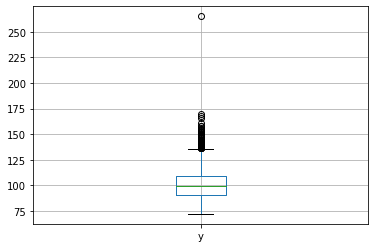

In [84]:
df_train_outputs.boxplot(column = 'y')

<AxesSubplot:>

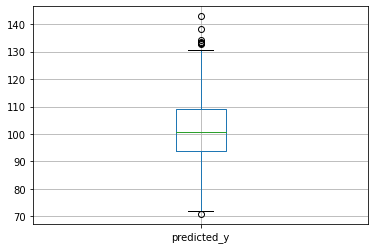

In [85]:
df_test_outputs.boxplot(column = 'predicted_y')

In [86]:
test_time_mins = sum(df_test_outputs['predicted_y'])
test_time_mins

426179.3492126465

In [87]:
train_time_mins = sum(df_train_outputs['y'])
train_time_mins

423717.1599999995

In [88]:
(train_time_mins - test_time_mins)/train_time_mins

-0.00581092635626789